In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [37]:
df = pd.read_csv("./additional/ParisHousing.csv")

In [38]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

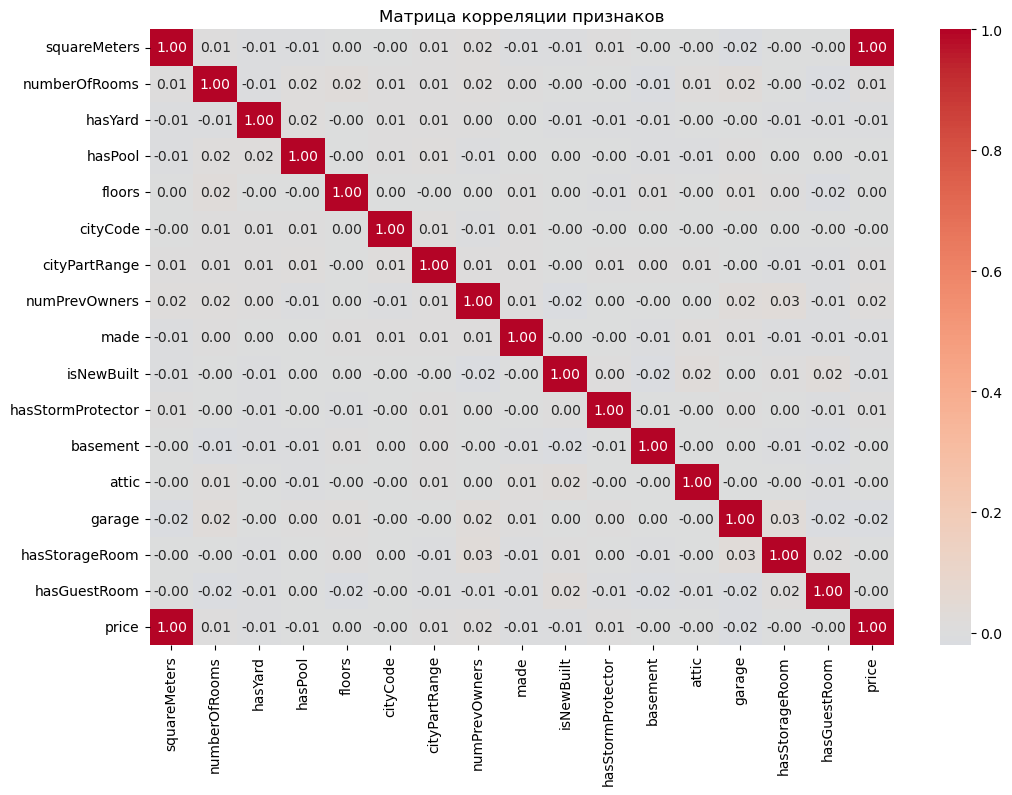

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

In [40]:
corr_matrix = df.corr() # расчёт корреляции

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Матрица корреляции признаков')
plt.show()

# сортировка по целевой переменной
target_corr = corr_matrix['price'].sort_values(ascending=False)
target_corr

In [6]:
# Отсортируем признаки по модулю корреляции с целевой переменной:
target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

price                1.000000
squareMeters         0.999999
garage              -0.017229
numPrevOwners        0.016619
isNewBuilt          -0.010643
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
made                -0.007210
hasYard             -0.006119
hasPool             -0.005070
basement            -0.003967
hasStorageRoom      -0.003485
floors               0.001654
cityCode            -0.001539
hasGuestRoom        -0.000644
attic               -0.000600
Name: price, dtype: float64

Реализуем нейронную сеть с помощью keras

In [7]:
from tensorflow.keras.models import Sequential # способ построения нейронной сети, где слои идут последовательно
from tensorflow.keras.layers import Dense # полносвязный слой (каждый нейрон текущ.слоя связан с каждым нейроном предыдущ.слоя)
from tensorflow.keras.layers import Input

In [14]:
X = df.drop('price', axis = 1).values
Y = df['price'].values

In [15]:
# нормализация входных данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Y_log = np.log1p(Y)

In [20]:
# Разделим данные на train и test
indices = list(range(len(X_scaled)))
random.shuffle(indices) # перемешаем индексы, чтобы деление было случайным

split = int(0.8 * len(X_scaled))
train_idx = indices[:split]
test_idx = indices[split:]

X_train = X_scaled[train_idx]
Y_train = Y_log[train_idx]
X_test = X_scaled[test_idx]
Y_test = Y_log[test_idx]

In [21]:
model = Sequential()
model.add(Input(shape = (16,))) # входной слой
model.add(Dense(64, activation = 'relu')) # 1-ый скрытый слой
model.add(Dense(32, activation = 'relu')) # 2-ой скрытый слой
model.add(Dense(1, activation = 'relu')) # выходной слой

In [22]:
# компилируем модель
model.compile(loss = 'mae', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
# обучение
model.fit(X_train, Y_train, epochs = 150, batch_size = 100)

Epoch 1/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0000e+00 - loss: 8.8108  
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.4090 
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.1188 
Epoch 4/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.9748 
Epoch 5/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.8675   
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.7789  
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.7112 
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.6482   
Epoch 9/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5985 
Epoch 10/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 0.5417   
Epoch 11/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.4885 


In [28]:
# проверим работу на тестовой выборке
Y_pred_log = model.predict(X_test)
# Y_pred = np.expm1(Y_pred_log)  # обратное преобразование
# Y_true = np.expm1(Y_test)

# смотрим метрики
mae = mean_absolute_error(Y_test, Y_pred_log)

print(f"MAE: {mae:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.05


In [29]:
# посмотрим ещё линейную регрессию от scikit-learn

from sklearn.linear_model import LinearRegression

In [33]:
X_np = np.array(X_scaled)
Y_np = np.array(Y_log)

In [34]:
# Обучение модели
model = LinearRegression()
model.fit(X_np, Y_np)

LinearRegression()

In [35]:
sklearn_preds = model.predict(X_np)
sklearn_mae = mean_absolute_error(Y_np, sklearn_preds)

f"MAE: {round(sklearn_mae, 4)}"

'MAE: 0.3254'

Как видим, линейная модель показывает результаты хуже, но это и ожидаемо (взглянув на матрицу корреляции, можно понять, что кроме как метраж, ничего явной линейной связи с целевой переменной не имеет). Нейронные сети как раз-таки ищут нелинейные связи, соответственно, она (нейронная сеть) справилась с этой задачей лучше, что отразилось в ошибке.